#### Table of Contents <a id='toc'></a>

### [Introduction](#intro)
### [Business & Data Understanding](#bdu)
### [Prepare Data](#prepare_data)
### [Data Modelling](#data_modelling)
### [Evaluation](#evaluation)

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Introduction <a id='intro'></a>
[back](#toc)

The data for this project is from a kaggle competition for predicting the result of one round of online game PLAYERUNKNOWN'S BATTLEGROUND (PUBG): https://www.kaggle.com/c/pubg-finish-placement-prediction/overview. PUBG is a multiplayer battle royal online game. The player lands with about 100 others on an island and has to fight against the others. The required items such as weapons or medical equipment must be collected by the players themselves. The game area becomes smaller during the game, which forces an encounter with the other players.

### Business & Data Understanding <a id='bdu'></a>
[back](#toc)

In [2]:
train = pd.read_csv('pubg_train.csv')

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [5]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [6]:
train.matchId.value_counts()

efc2b20c73ae65    100
ae0e32d0b0ec5e    100
6d5a50a810766d    100
1c6e6e40af7874    100
1b4352d5f20f95    100
93b3d01b1c1da3    100
ec7d36c4c9120f    100
6fb6574f3f7da6    100
e6e0f410931cbd    100
b8745a1c339c19    100
e744c7f0d50ec0    100
b927fc49fb47bb    100
8d537e706a864b    100
aefc47a20d3c7d    100
fdb8bc513a0709    100
24f25cbcd9c01d    100
89f4c0227ba9b2    100
ec124840b9a895    100
a8fe1928364636    100
70c3de6dae6d1b    100
c87f6dbe4ce6ed    100
7c64d2bc26824a    100
4f23683cab132c    100
2e517a3f5c2b88    100
27c706bc3371e0    100
cf996ed9e2fbec    100
223257f8e6173d    100
361339b8c00171    100
8388d29ddcdbd8    100
990653af8e532c    100
                 ... 
e263f4a227313a      8
9b5eba3473e5f0      8
cedb9e88b4b255      8
9e7dcc7b9a5162      8
71af975b5e9a8a      8
93513672bce7d5      8
e3c824e12ff949      8
37989d2861a855      8
ce4a6dc88c487c      8
c1217e571d7932      8
378847703cc63b      8
17c643ab998ecb      8
998a86ce7ec062      7
6fd4b1adb6da3c      7
1f251de6c4

ValueError: max must be larger than min in range parameter.

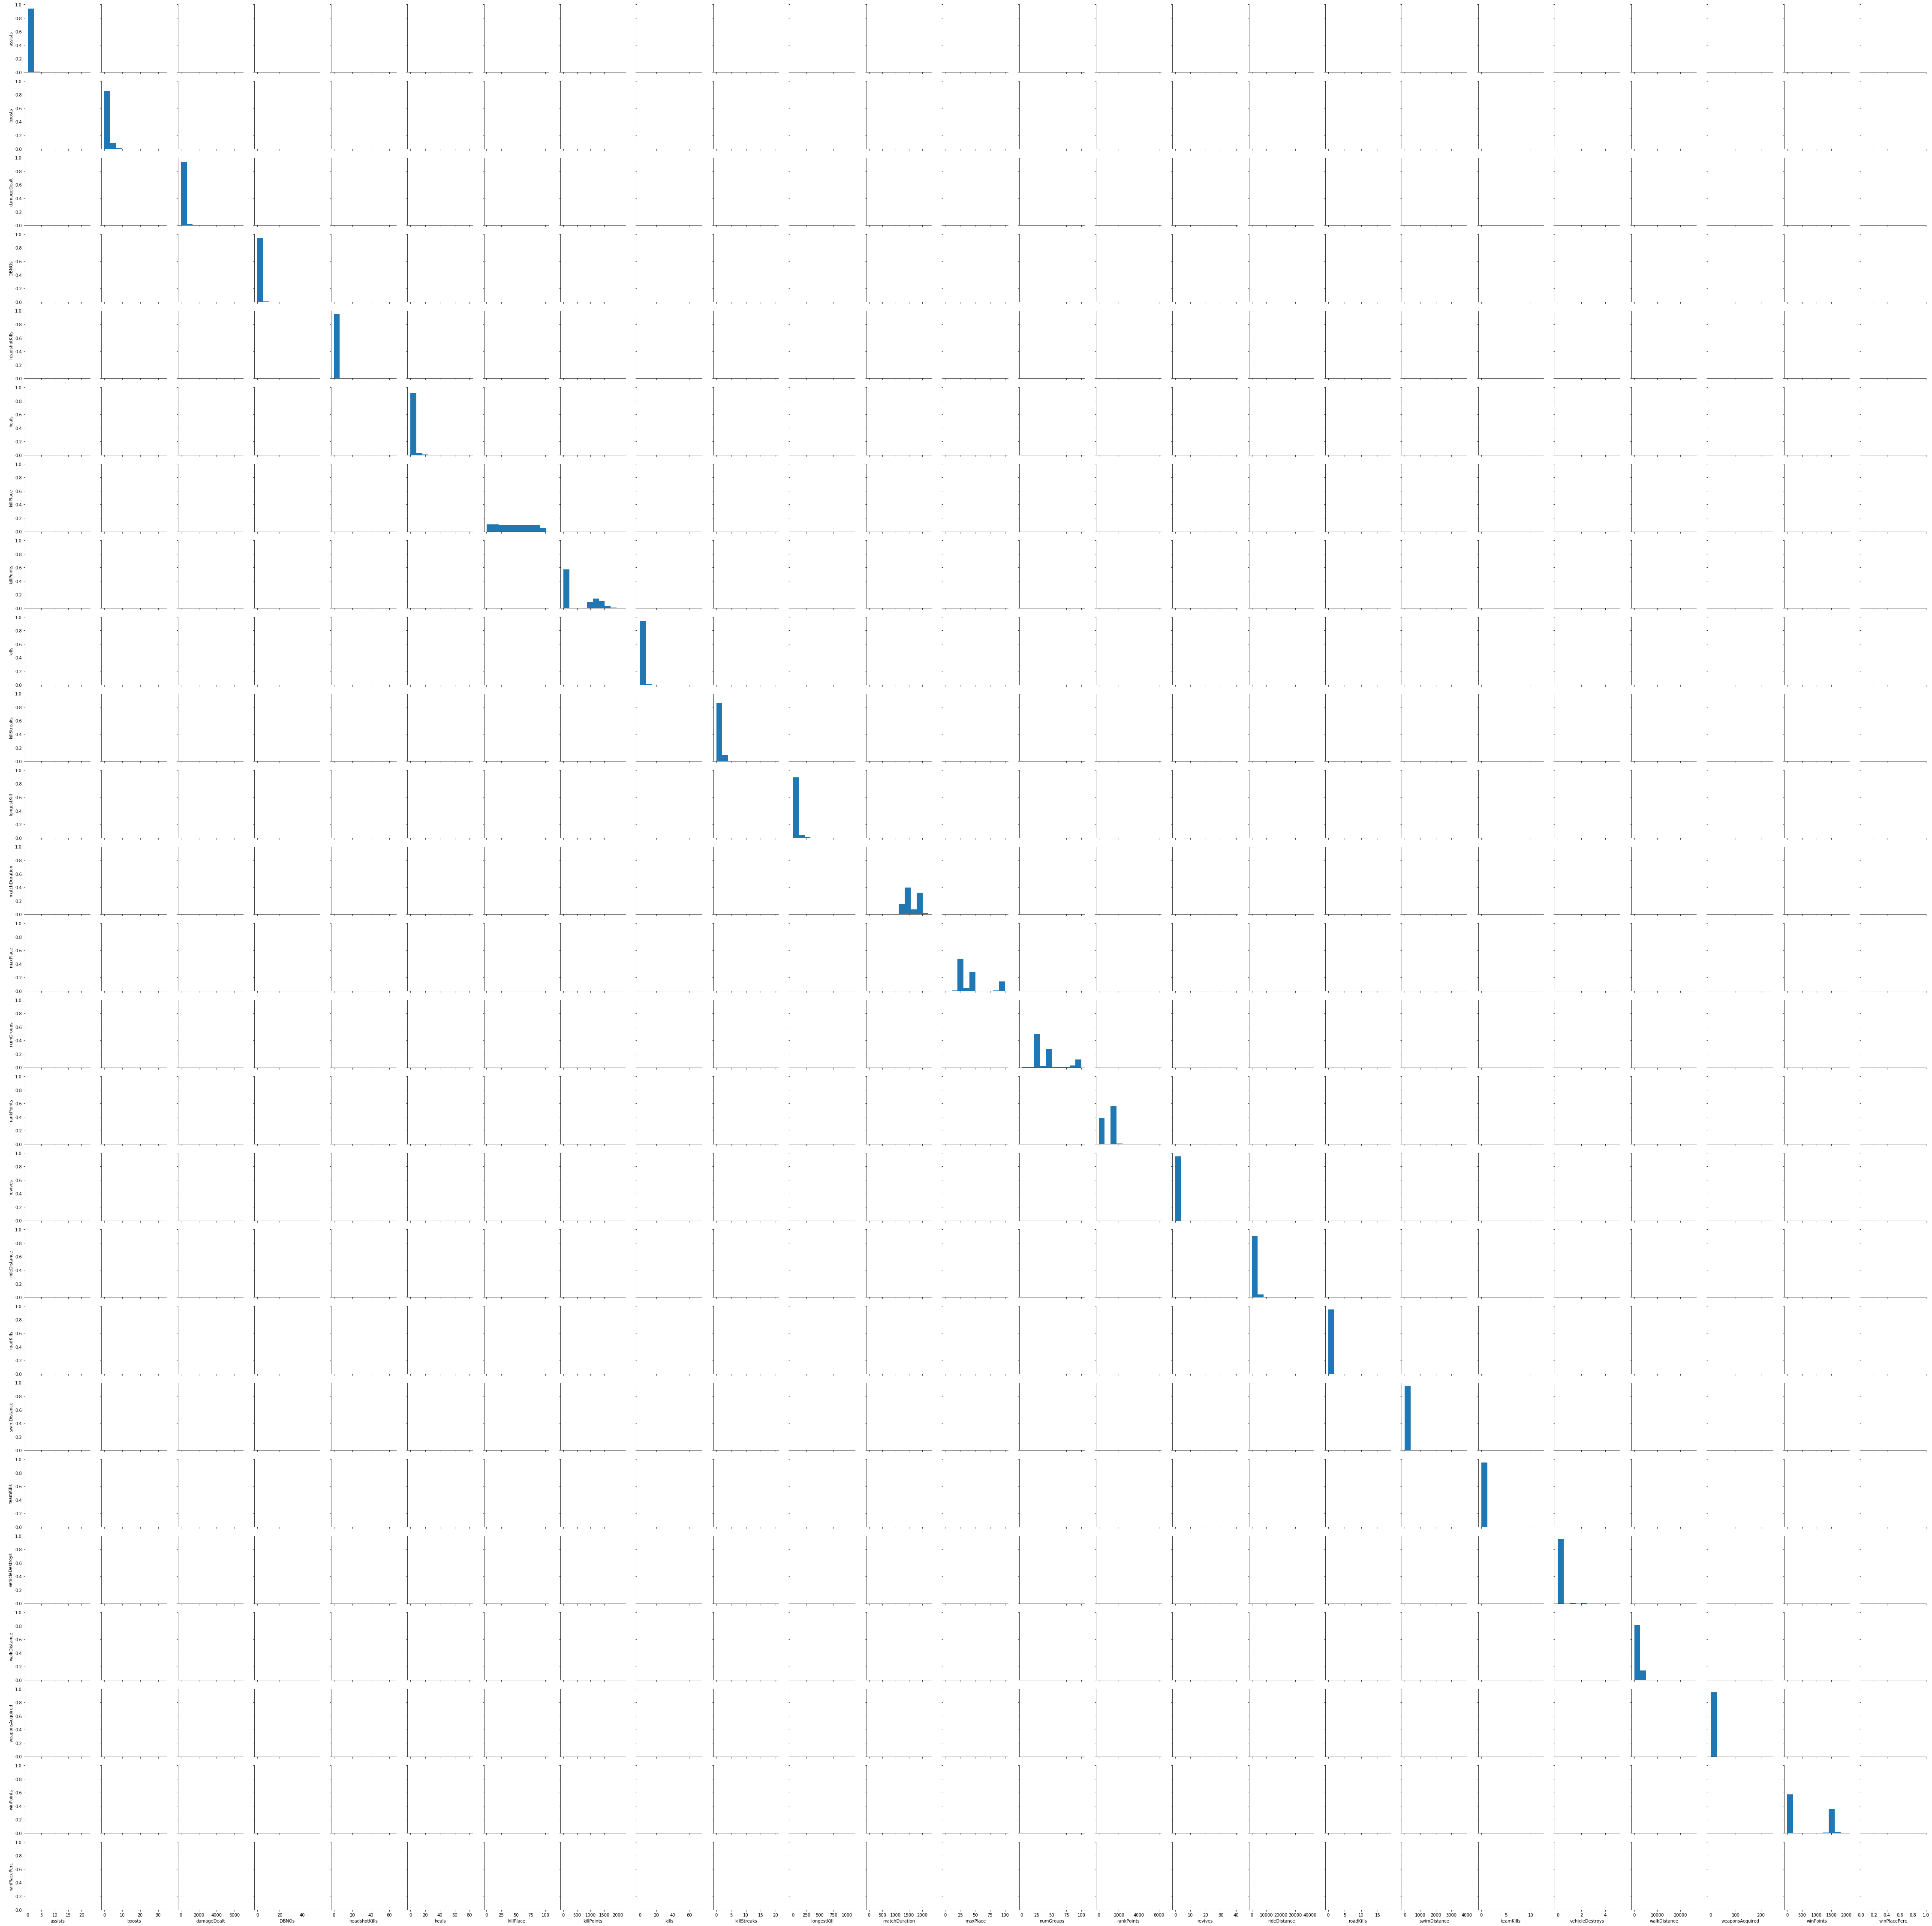

In [7]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### Prepare Data <a id='prepare_data'></a>
[back](#toc)

### Data Modelling <a id='data_modelling'></a>
[back](#toc)

### Evaluation <a id='evaluation'></a>
[back](#toc)